In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Necessary Libraries

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading Data

In [3]:
cancer = load_breast_cancer()

The line of code `cancer = load_breast_cancer()` is part of a typical workflow in machine learning or data analysis when using the `scikit-learn` library in Python. Here's a detailed explanation of this code:

1. **scikit-learn (sklearn) Library**:
   - `scikit-learn` is a powerful and widely used machine learning library in Python. It provides simple and efficient tools for data mining and data analysis, built on NumPy, SciPy, and matplotlib.

2. **Importing the `load_breast_cancer` Function**:
   - Before you can use `load_breast_cancer`, you need to import it from the `datasets` module in `scikit-learn`. This is typically done with the following line of code:
     ```python
     from sklearn.datasets import load_breast_cancer
     ```

3. **The `load_breast_cancer` Function**:
   - The `load_breast_cancer` function is a utility function in `scikit-learn` that loads and returns the breast cancer dataset. This dataset is a classic and widely used dataset for binary classification tasks, where the goal is to classify tumors as malignant or benign based on various features.

4. **Loading the Dataset**:
   - When you call `load_breast_cancer()`, it loads the dataset into memory and returns it as a Bunch object, which is a subclass of Python's dictionary and can be used like a dictionary.
   - The `Bunch` object contains several attributes, including:
     - `data`: The feature matrix (a 2D array) where each row represents a sample and each column represents a feature.
     - `target`: The target array (a 1D array) where each entry represents the label for the corresponding sample (0 for benign, 1 for malignant).
     - `feature_names`: An array of strings containing the names of the features.
     - `target_names`: An array of strings containing the names of the target classes.
     - `DESCR`: A string containing a full description of the dataset.
     - `filename`: The physical location of the dataset file.
     - `frame`: A DataFrame containing the data and target, if pandas is installed.

5. **Assigning the Dataset to a Variable**:
   - `cancer = load_breast_cancer()`: This line assigns the loaded breast cancer dataset to the variable `cancer`. After executing this line, `cancer` is a Bunch object containing all the information and data of the breast cancer dataset.


In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**`cancer.keys()`**:
   - This will print the keys of the Bunch object, which typically includes `['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']`.

In [5]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Creating a DataFrame

In [8]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['label'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Creating a DataFrame**:
   - A pandas DataFrame is created from the feature matrix `cancer.data`, with columns named according to `cancer.feature_names`.
   - The target array `cancer.target` is added to the DataFrame as a new column named 'target'.

# Visualization

<Axes: ylabel='count'>

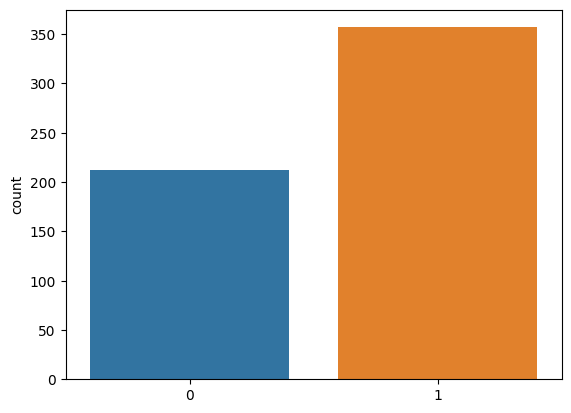

In [9]:
sns.countplot(x = cancer['target'])

Here's a breakdown of each component:

### Seaborn Library
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### The `countplot` Function
The `countplot` function in Seaborn is used to create a bar plot that shows the counts of observations in each categorical bin using bars. It is especially useful for visualizing the distribution of categorical data.

### Code Explanation
```python
sns.countplot(x = cancer['target'])
```

1. **`sns`**: This is the alias commonly used for the Seaborn library. When you import Seaborn, you typically use:
   ```python
   import seaborn as sns
   ```

2. **`countplot`**: This is the function within the Seaborn library that creates the count plot.

3. **`x = cancer['target']`**: This is the parameter passed to the `countplot` function.
   - **`x`**: This specifies that the data provided is for the x-axis.
   - **`cancer['target']`**: This is the data being plotted. Here, `cancer` is assumed to be a Pandas DataFrame, and `'target'` is the name of the column within that DataFrame. This column contains the categorical data that you want to plot.

### What the Code Does
- The code creates a bar plot where the x-axis represents the different categories within the `target` column of the `cancer` DataFrame.
- Each bar corresponds to a unique category in the `target` column.
- The height of each bar represents the number of occurrences (count) of each category in the `target` column.

### Example Visualization
If the `cancer['target']` column contains data about whether cancer is benign (0) or malignant (1), the resulting plot would have:
- Two bars: one for 0 (benign) and one for 1 (malignant).
- The height of each bar would indicate how many samples are benign and how many are malignant.


# Splitting the Dataset

In [10]:
x = cancer['data']
y = cancer['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

This code is part of a typical machine learning workflow in Python, using the popular library `scikit-learn`. Here’s a detailed explanation of each line of code:

### 1. Importing Data

```python
x = cancer['data']
y = cancer['target']
```

In these lines, the code is accessing the features and labels from the `cancer` dataset.

- `cancer['data']`: This part extracts the features (inputs) of the dataset, which are typically in the form of a 2D array or DataFrame. Each row represents an instance (e.g., a patient's data), and each column represents a feature (e.g., measurements from cancer screening).
- `cancer['target']`: This part extracts the labels (outputs) of the dataset, which are typically in the form of a 1D array or Series. Each entry represents the class label or target variable for the corresponding instance in the data.

### 2. Splitting the Data

```python
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
```

In this line, the code is splitting the dataset into training and testing subsets using the `train_test_split` function from `scikit-learn`.

- `train_test_split(x, y, test_size=0.2)`: This function takes the features `x` and the labels `y`, and splits them into training and testing sets.
  - `x`: The input features.
  - `y`: The target labels.
  - `test_size=0.2`: This parameter specifies the proportion of the dataset to include in the test split. Here, `0.2` means 20% of the data will be used for testing, and the remaining 80% will be used for training.

The function returns four variables:
- `x_train`: The training set features.
- `x_test`: The testing set features.
- `y_train`: The training set labels.
- `y_test`: The testing set labels.

### Summary

Putting it all together, the code does the following:

1. **Extracts the Features and Labels**: `x` gets the features from the `cancer` dataset, and `y` gets the corresponding labels.
2. **Splits the Data**: Using `train_test_split`, it divides the data into training and testing sets. This is crucial for training the model on one subset of the data (`x_train`, `y_train`) and evaluating its performance on a separate subset (`x_test`, `y_test`).

### Context

In the context of machine learning:
- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate the performance of the trained model to ensure it generalizes well to new, unseen data.

This process helps in assessing the model’s performance and its ability to generalize to new data, thereby preventing overfitting.

# Model Building

In [11]:
model = DecisionTreeClassifier()

This line of code is written in Python and is part of the scikit-learn library, which is a popular machine learning library in Python. Let's break it down in detail:

1. **`model`**:
   - This is a variable name, and in this context, it is used to store an instance of the `DecisionTreeClassifier` class. The variable name can be anything, but `model` is a common convention.

2. **`DecisionTreeClassifier`**:
   - This is a class provided by the scikit-learn library. The class implements a decision tree algorithm for classification tasks.
   - A decision tree is a flowchart-like tree structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome (class label).
   - Decision trees are used for both classification and regression tasks. The `DecisionTreeClassifier` specifically is used for classification tasks, meaning it helps in predicting a category or class label.

3. **`DecisionTreeClassifier()`**:
   - This is a constructor call that creates a new instance of the `DecisionTreeClassifier` class.
   - When called without any parameters, it initializes the classifier with default settings. However, the constructor can accept several parameters to customize the behavior of the decision tree. Some of the common parameters include:
     - `criterion`: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
     - `splitter`: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
     - `max_depth`: The maximum depth of the tree. If not specified, the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
     - `min_samples_split`: The minimum number of samples required to split an internal node.
     - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
     - `max_features`: The number of features to consider when looking for the best split.
     - `random_state`: Controls the randomness of the estimator. The features are always randomly permuted at each split.

Here’s a more detailed example with parameters:

```python
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with custom parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
```

In this example:
- `criterion='entropy'` specifies that the model should use information gain as the criterion for splitting.
- `max_depth=3` limits the depth of the tree to 3 levels.
- `random_state=42` ensures reproducibility of the results by controlling the randomness.

**Summary**:
- The line `model = DecisionTreeClassifier()` creates an instance of the decision tree classifier with default settings.
- This model can then be trained on data and used to make predictions for classification tasks. 

Next steps typically involve fitting the model to data using `model.fit(X, y)` where `X` is the feature matrix and `y` is the target vector, and then making predictions using `model.predict(X_test)`.

# Hyperparameter Tuning

In [12]:
dist = {"max_depth" : [3, None],
       "max_features":range(1,11),
       "min_samples_split": range(2,11),
       "criterion": ['gini', 'entropy']}

This code snippet defines a dictionary named `dist` which is commonly used for specifying the parameter grid in a machine learning model's hyperparameter tuning process. Here, it seems to be tailored for tuning the hyperparameters of a decision tree classifier or a similar model in a machine learning framework such as scikit-learn. Let's break down each key-value pair in the dictionary:

### `max_depth`
```python
"max_depth": [3, None]
```
- **Definition**: This parameter specifies the maximum depth of the tree.
- **Values**: It can take on the values 3 or None.
  - `3`: This means the tree can grow to a maximum depth of 3 levels.
  - `None`: This means the tree can grow until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

### `max_features`
```python
"max_features": range(1, 11)
```
- **Definition**: This parameter specifies the number of features to consider when looking for the best split.
- **Values**: It can take on any integer value from 1 to 10 (inclusive).
  - `range(1, 11)`: This creates a range object which includes integers from 1 to 10. In the context of decision trees, this controls the number of features to consider at each split.

### `min_samples_split`
```python
"min_samples_split": range(2, 11)
```
- **Definition**: This parameter specifies the minimum number of samples required to split an internal node.
- **Values**: It can take on any integer value from 2 to 10 (inclusive).
  - `range(2, 11)`: This creates a range object which includes integers from 2 to 10. A split will only be considered if it leaves at least `min_samples_split` samples in each of the left and right branches.

### `criterion`
```python
"criterion": ['gini', 'entropy']
```
- **Definition**: This parameter specifies the function to measure the quality of a split.
- **Values**: It can take on the values 'gini' or 'entropy'.
  - `'gini'`: This uses the Gini impurity as a criterion for choosing splits.
  - `'entropy'`: This uses information gain (based on entropy) as a criterion for choosing splits.


## RandomizedSearchCV

In [13]:
rs = RandomizedSearchCV(model, param_distributions = dist, n_iter = 50, cv = 5)
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

This code snippet uses `RandomizedSearchCV` from the `scikit-learn` library to perform hyperparameter optimization for a machine learning model. Let's break it down step by step:

### 1. Importing Necessary Libraries

```python
from sklearn.model_selection import RandomizedSearchCV
```

### 2. Defining the RandomizedSearchCV Object

```python
rs = RandomizedSearchCV(model, param_distributions=dist, n_iter=50, cv=5)
```

This line creates an instance of the `RandomizedSearchCV` class. Here's what each parameter means:

- **`model`**: This is the machine learning model you want to tune. It can be any model from `scikit-learn` such as `RandomForestClassifier()`, `SVC()`, etc.
- **`param_distributions`**: This is a dictionary (`dist`) where the keys are the hyperparameters of the model, and the values are distributions or lists of values from which the hyperparameters will be sampled. For example:
  ```python
  dist = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10]
  }
  ```
  Here, `n_estimators`, `max_depth`, and `min_samples_split` are hyperparameters of a decision tree or random forest model.
- **`n_iter=50`**: This specifies the number of different combinations of hyperparameters to try. In this case, it will sample 50 different combinations.
- **`cv=5`**: This stands for cross-validation and specifies the number of folds. Here, 5-fold cross-validation is used, which means the dataset is split into 5 parts and the model is trained and validated 5 times, each time using a different fold as the validation set and the remaining 4 folds as the training set.

### 3. Fitting the RandomizedSearchCV Object

```python
rs.fit(x_train, y_train)
```

This line fits the `RandomizedSearchCV` object (`rs`) to the training data:

- **`x_train`**: The input features of the training data.
- **`y_train`**: The target variable of the training data.

During the fitting process, `RandomizedSearchCV` will:
1. Randomly sample 50 different combinations of hyperparameters from the distributions provided.
2. For each combination, it will train the model using 5-fold cross-validation.
3. Evaluate the performance of the model for each combination of hyperparameters.
4. Select the combination of hyperparameters that gives the best cross-validated performance according to the default scoring method (which can be changed using the `scoring` parameter).

### What Happens Internally

1. **Sampling Hyperparameters**: `RandomizedSearchCV` will randomly select 50 sets of hyperparameters from the specified distributions.
2. **Cross-Validation**: For each set of hyperparameters, it will:
   - Split the training data (`x_train`, `y_train`) into 5 folds.
   - Train the model on 4 folds and validate it on the remaining fold. This process is repeated 5 times, each time with a different fold as the validation set.
   - Compute the average performance across the 5 folds.
3. **Selecting the Best Model**: After evaluating all 50 sets of hyperparameters, `RandomizedSearchCV` will identify the set that gave the best performance on the validation sets.

### Final Result

After fitting, `rs.best_params_` will contain the best set of hyperparameters found, and `rs.best_estimator_` will be the model trained with those hyperparameters on the entire training set. You can use this optimized model to make predictions on new data.


In [14]:
rs.best_params_

{'min_samples_split': 7,
 'max_features': 7,
 'max_depth': 3,
 'criterion': 'gini'}

The `rs.best_params_` attribute in the `RandomizedSearchCV` object contains the best hyperparameter settings found during the search. These are the parameters that resulted in the highest cross-validated performance.



In [15]:
rs.best_score_

0.9406593406593406

The `rs.best_score_` attribute in the `RandomizedSearchCV` object provides the best score achieved during the cross-validation process for the best set of hyperparameters found. This score is typically the mean cross-validated score of the best estimator, giving you an indication of how well the model with the best hyperparameters performed during the cross-validation process.



## GridSearchCV

In [16]:
gs = GridSearchCV(model, param_grid = dist, cv = 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': range(1, 11),
                         'min_samples_split': range(2, 11)})

The code snippet you provided uses `GridSearchCV` from the `scikit-learn` library to perform an exhaustive search over a specified hyperparameter grid for a machine learning model. Here's a detailed explanation:

### 1. Importing Necessary Libraries

```python
from sklearn.model_selection import GridSearchCV
```

### 2. Defining the GridSearchCV Object

```python
gs = GridSearchCV(model, param_grid=dist, cv=5)
```

This line creates an instance of the `GridSearchCV` class. Here's what each parameter means:

- **`model`**: This is the machine learning model you want to tune. It can be any model from `scikit-learn` such as `RandomForestClassifier()`, `SVC()`, etc.
- **`param_grid`**: This is a dictionary (`dist`) where the keys are the hyperparameters of the model, and the values are lists of values to be tried. For example:
  ```python
  dist = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10]
  }
  ```
  Here, `n_estimators`, `max_depth`, and `min_samples_split` are hyperparameters of a decision tree or random forest model.
- **`cv=5`**: This stands for cross-validation and specifies the number of folds. Here, 5-fold cross-validation is used, which means the dataset is split into 5 parts and the model is trained and validated 5 times, each time using a different fold as the validation set and the remaining 4 folds as the training set.

### 3. Fitting the GridSearchCV Object

```python
gs.fit(x_train, y_train)
```

This line fits the `GridSearchCV` object (`gs`) to the training data:

- **`x_train`**: The input features of the training data.
- **`y_train`**: The target variable of the training data.

During the fitting process, `GridSearchCV` will:
1. Create all possible combinations of hyperparameters from the grid provided.
2. For each combination, it will train the model using 5-fold cross-validation.
3. Evaluate the performance of the model for each combination of hyperparameters.
4. Select the combination of hyperparameters that gives the best cross-validated performance according to the default scoring method (which can be changed using the `scoring` parameter).

### What Happens Internally

1. **Exhaustive Search**: `GridSearchCV` will try every possible combination of hyperparameters specified in `param_grid`.
2. **Cross-Validation**: For each combination of hyperparameters, it will:
   - Split the training data (`x_train`, `y_train`) into 5 folds.
   - Train the model on 4 folds and validate it on the remaining fold. This process is repeated 5 times, each time with a different fold as the validation set.
   - Compute the average performance across the 5 folds.
3. **Selecting the Best Model**: After evaluating all combinations of hyperparameters, `GridSearchCV` will identify the set that gave the best performance on the validation sets.

### Final Result

After fitting, `gs.best_params_` will contain the best set of hyperparameters found, and `gs.best_estimator_` will be the model trained with those hyperparameters on the entire training set. You can use this optimized model to make predictions on new data.


In [17]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_split': 6}

In [18]:
gs.best_score_

0.9494505494505494

In [19]:
final = gs.best_estimator_
final

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_split=6)

After fitting `GridSearchCV`, the `gs.best_estimator_` attribute contains the model with the best combination of hyperparameters found during the grid search. You can use this model for making predictions on new data.

[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.474\nsamples = 455\nvalue = [176, 279]'),
 Text(0.25, 0.625, 'x[23] <= 893.65\ngini = 0.118\nsamples = 271\nvalue = [17, 254]'),
 Text(0.125, 0.375, 'x[13] <= 48.7\ngini = 0.053\nsamples = 256\nvalue = [7, 249]'),
 Text(0.0625, 0.125, 'gini = 0.039\nsamples = 254\nvalue = [5, 249]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.375, 'x[1] <= 17.385\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4375, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.75, 0.625, 'x[22] <= 103.25\ngini = 0.235\nsamples = 184\nvalue = [159, 25]'),
 Text(0.625, 0.375, 'x[21] <= 25.925\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.875, 0.375, 'x[1] <= 16.795\ngini = 0.094\nsamples = 161\nvalue = [153, 8]'

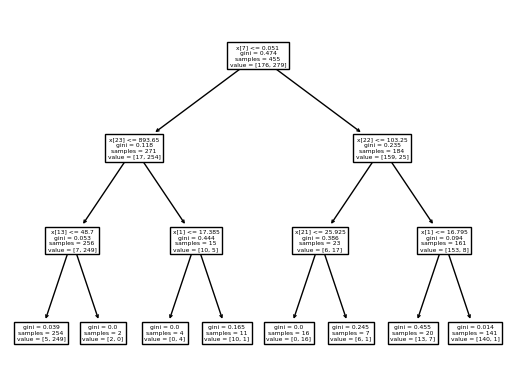

In [20]:
tree.plot_tree(final)

When you want to visualize the decision tree. However, the `tree.plot_tree()` function is not available for a `RandomForestClassifier`. This function is specifically for visualizing decision trees generated by models like `DecisionTreeClassifier`. 

This will plot the first decision tree in the random forest ensemble. If you want to visualize a specific decision tree within the forest, you can access it using `final.estimators_[index]`, where `index` is the index of the decision tree you want to visualize.

# Testing the Model

In [21]:
y_pred = final.predict(x_test)

We made predictions on our test data using the final optimized model. Now, `y_pred` contains the predicted labels for the test data `x_test`. We can use these predictions to evaluate the performance of our model. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1-score, etc.

For example, to calculate accuracy:

```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```

Similarly, you can calculate other metrics depending on your specific requirements and the nature of your dataset.


In [22]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [23]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

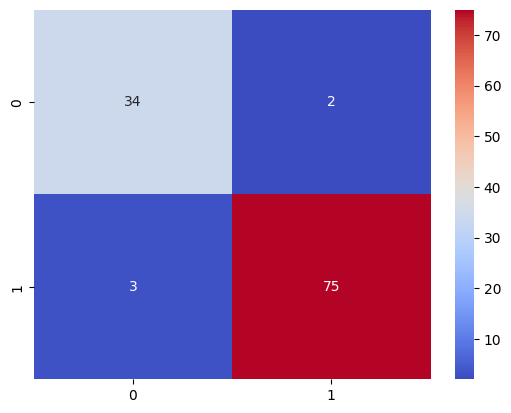

In [24]:
sns.heatmap(cm, cmap = "coolwarm", annot = True)

Sure! This code snippet involves using the `confusion_matrix` function from the `sklearn.metrics` module to generate a confusion matrix, and then visualizing the confusion matrix using `seaborn`'s `heatmap` function. Here's a detailed explanation:

### 1. Importing Necessary Libraries

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
```

### 2. Generating the Confusion Matrix

```python
cm = confusion_matrix(y_test, y_pred)
```

This line calculates the confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm. The confusion matrix `cm` is a square matrix where the rows correspond to the true classes and the columns correspond to the predicted classes.

- **`y_test`**: The true labels of the test data.
- **`y_pred`**: The predicted labels generated by the model for the test data.

### 3. Visualizing the Confusion Matrix

```python
sns.heatmap(cm, cmap="coolwarm", annot=True)
```

This line creates a heatmap of the confusion matrix using `seaborn`'s `heatmap` function. Here's what each parameter means:

- **`cm`**: The confusion matrix calculated earlier.
- **`cmap="coolwarm"`**: This parameter specifies the color map to be used for the heatmap. In this case, it's set to "coolwarm", which represents low values with cool colors (blues) and high values with warm colors (reds).
- **`annot=True`**: This parameter specifies whether to annotate each cell of the heatmap with the numeric value. Setting it to `True` adds numerical annotations to the heatmap cells.

### What Happens Internally

The `sns.heatmap` function takes the confusion matrix `cm` and visualizes it as a heatmap. Each cell in the heatmap represents the number of instances that were classified correctly or incorrectly. The color intensity represents the number of instances, with darker colors indicating higher values.


This code will display a heatmap visualization of the confusion matrix. Each cell in the heatmap represents the number of instances where the true label (row) and the predicted label (column) intersect. The diagonal elements of the matrix represent correct predictions, while off-diagonal elements represent incorrect predictions.

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.96      0.97      0.97        77

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The `classification_report` function from `scikit-learn` library generates a comprehensive report of various classification metrics for each class in your classification problem. Let's break down the code:

### Importing Necessary Libraries
```python
from sklearn.metrics import classification_report
```
This line imports the `classification_report` function from the `sklearn.metrics` module.

### Generating the Classification Report
```python
print(classification_report(y_pred, y_test))
```
This line generates the classification report and prints it to the console.

- **`y_pred`**: This is the array containing the predicted labels for the test data.
- **`y_test`**: This is the array containing the true labels for the test data.

### Output of `classification_report`

The classification report consists of the following metrics for each class:
- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives.
- **Recall**: Recall measures the proportion of true positive predictions among all actual positives in the data. It is calculated as the ratio of true positives to the sum of true positives and false negatives.
- **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).
- **Support**: Support is the number of actual occurrences of the class in the specified dataset.
- **Accuracy**: Accuracy is the proportion of correctly classified instances out of all instances in the dataset.

The report also includes:
- **Macro average**: Average of the metrics calculated for each class, giving each class equal weight.
- **Weighted average**: Average of the metrics calculated for each class, weighted by the number of true instances for each class.


This will output the classification report containing precision, recall, F1-score, and support for each class, as well as the macro and weighted averages.


-------------------------------------------------------------------------------------------------

Hi there,

I wanted to take a moment to express my sincere gratitude to each and every one of you who took the time to explore my Kaggle notebook. Your interest and engagement mean the world to me!

I hope you found the content insightful and valuable. Whether you were seeking knowledge, inspiration, or simply curious exploration, your presence is greatly appreciated.

Your feedback, questions, and insights are always welcome. Feel free to reach out if you have any comments or suggestions. Let's continue to learn and grow together!

Thank you once again for your visit. Wishing you all the best on your data science journey!

Warm regards,

Akanksha